In [ ]:
#import pandas and matplotlib for reading in pkl file containing TNG50 data and creating plots
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load pkl file using pandas
df_loaded = pd.read_pickle("morphologies_snapshot_data.pkl")
# df_loaded = pd.read_csv("galaxies_morph.csv")
#print the data type of each column and name of data columns
print(df_loaded.dtypes)
print(df_loaded.columns)


Snapshot        int16
P_Disk        float32
P_Irr         float32
P_Spheroid    float32
SubhaloID       int32
dtype: object
Index(['Snapshot', 'P_Disk', 'P_Irr', 'P_Spheroid', 'SubhaloID'], dtype='object')


In [ ]:
#print snapshot number, probabilities of disk, irregulars and spheroid as well as subhalo IDs
df_loaded


,Snapshot,P_Disk,P_Irr,P_Spheroid,SubhaloID
0,25,7.245970e-02,0.117432,0.722801,0
1,25,5.781485e-01,0.998808,0.005097,1
2,25,4.213989e-03,0.956770,0.000231,2
3,25,1.822633e-07,0.940426,0.000151,3
4,25,2.275765e-03,0.683999,0.009307,4
...,...,...,...,...,...
11042,67,1.095557e-02,0.036651,0.673602,682369
11043,67,6.801021e-01,0.075180,0.808437,695842
11044,67,9.071031e-01,0.472021,0.525315,700971
11045,67,5.779260e-01,0.255193,0.776309,717138


In [20]:
#extract only the unique values for snapshot number and write them to a list
snapshot_values = df_loaded["Snapshot"].drop_duplicates().to_list()
snapshot_values

[25, 29, 33, 40, 50, 67]

In [ ]:
#append the total number of galaxies per snapshot to a numpy array
galaxies_count = []
for val in snapshot_values:
    #print(val, ":", df_loaded[df_loaded["Snapshot"]==val].shape[0])
    galaxies_count.append(df_loaded[df_loaded["Snapshot"]==val].shape[0])

#print the total number of galaxies in each snapshot in TNG50
for i in range(0,6):
    print('There are',galaxies_count[i],'number of galaxies in snapshot number',snapshot_values[i])
    #print(galaxies_count)

There are 837 number of galaxies in snapshot number 25
There are 1212 number of galaxies in snapshot number 29
There are 1587 number of galaxies in snapshot number 33
There are 2014 number of galaxies in snapshot number 40
There are 2474 number of galaxies in snapshot number 50
There are 2923 number of galaxies in snapshot number 67


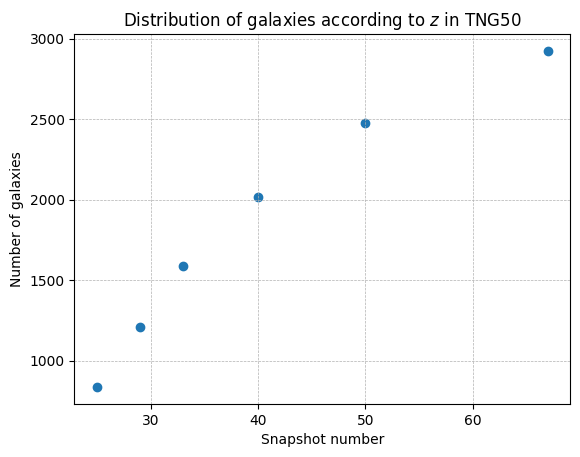

In [ ]:
#plot galaxy counts as a function of snapshot number
plt.scatter(snapshot_values, galaxies_count)
plt.xlabel('Snapshot number')
plt.ylabel('Number of galaxies')
plt.title(r'Distribution of galaxies according to $z$ in TNG50')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout
#plt.savefig('GalCount_Redshift.png')
plt.show()


In [9]:
galmorph.galaxy_type(snapshot_values)


NameError: name 'galmorph' is not defined

In [12]:

def assign_galaxy_type(row) -> str:
    """
    Assigns a galaxy type based on the highest value among three input columns.

    Parameters:
        row (pd.Series): A row from a DataFrame.
        col_elliptical (str): Column name for elliptical score/value.
        col_spiral (str): Column name for spiral score/value.
        col_irregular (str): Column name for irregular score/value.

    Returns:
        str: 'elliptical', 'spiral', or 'irregular' depending on which value is highest.
    """
    values = {
        'elliptical': row["P_Spheroid"],
        'spiral': row["P_Disk"],
        'irregular': row["P_Irr"]
    }
    return max(values, key=values.get)


In [13]:
assign_galaxy_type(df_loaded.iloc[0])


'elliptical'

In [ ]:
#add another column referring to what we categorize each galaxy as morphologically to the refined dataset 
df_loaded["Galaxy_type"] = df_loaded.apply(assign_galaxy_type, axis=1)

0        elliptical
1         irregular
2         irregular
3         irregular
4         irregular
            ...    
11042    elliptical
11043    elliptical
11044        spiral
11045    elliptical
11046    elliptical
Name: Galaxy_type, Length: 11047, dtype: object

In [18]:
df_loaded


,Snapshot,P_Disk,P_Irr,P_Spheroid,SubhaloID,Galaxy_type
0,25,7.245970e-02,0.117432,0.722801,0,elliptical
1,25,5.781485e-01,0.998808,0.005097,1,irregular
2,25,4.213989e-03,0.956770,0.000231,2,irregular
3,25,1.822633e-07,0.940426,0.000151,3,irregular
4,25,2.275765e-03,0.683999,0.009307,4,irregular
...,...,...,...,...,...,...
11042,67,1.095557e-02,0.036651,0.673602,682369,elliptical
11043,67,6.801021e-01,0.075180,0.808437,695842,elliptical
11044,67,9.071031e-01,0.472021,0.525315,700971,spiral
11045,67,5.779260e-01,0.255193,0.776309,717138,elliptical


In [ ]:
#select only galaxies tagged as elliptical, reset their index such that all indices are now continuous. 
#Then obtain each corresponding probability value and find the min and max
print(min((df_loaded[df_loaded["Galaxy_type"] == "elliptical"].reset_index())["P_Spheroid"]))

print(max((df_loaded[df_loaded["Galaxy_type"] == "elliptical"].reset_index())["P_Spheroid"]))


0.01684477925300598
0.9083166122436523


In [ ]:
#SHORTER METHOD BELOW!
#separate out the data snapshot-wise
Snapshot25 = (df_loaded[df_loaded["Snapshot"] == 25])
Snapshot29 = (df_loaded[df_loaded["Snapshot"] == 29])
Snapshot33 = (df_loaded[df_loaded["Snapshot"] == 33])
Snapshot40 = (df_loaded[df_loaded["Snapshot"] == 40])
Snapshot50 = (df_loaded[df_loaded["Snapshot"] == 50])
Snapshot67 = (df_loaded[df_loaded["Snapshot"] == 67])

In [59]:
#print min max probs for ellipticals, spirals and irregulars for one snapshot
print(min((Snapshot67[Snapshot67["Galaxy_type"] == "elliptical"].reset_index())["P_Spheroid"]))
print(max((Snapshot67[Snapshot67["Galaxy_type"] == "elliptical"].reset_index())["P_Spheroid"]))
print(min((Snapshot67[Snapshot67["Galaxy_type"] == "spiral"].reset_index())["P_Disk"]))
print(max((Snapshot67[Snapshot67["Galaxy_type"] == "spiral"].reset_index())["P_Disk"]))
print(min((Snapshot67[Snapshot67["Galaxy_type"] == "irregular"].reset_index())["P_Irr"]))
print(max((Snapshot67[Snapshot67["Galaxy_type"] == "irregular"].reset_index())["P_Irr"]))

0.01684477925300598
0.9083166122436523
0.20678123831748962
0.992681622505188
0.022211015224456787
0.9880936145782471


In [27]:
#find the galaxy index corresponding to the minimum probability value for the galaxy being spheroidal
min_index= (df_loaded[df_loaded["Galaxy_type"] == "elliptical"]).loc[:,"P_Spheroid"].idxmin()
min_index


np.int64(8947)

In [28]:
df_loaded.iloc[min_index]


Snapshot               67
P_Disk           0.000002
P_Irr             0.01199
P_Spheroid       0.016845
SubhaloID          279689
Galaxy_type    elliptical
Name: 8947, dtype: object

In [71]:
#sort all galaxies morphologically in every snapshot
Snap25_Ell = df_loaded[df_loaded["Snapshot"]== 25][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
Snap25_Spi = df_loaded[df_loaded["Snapshot"]== 25][df_loaded["Galaxy_type"] == "spiral"].reset_index()
Snap25_Irr = df_loaded[df_loaded["Snapshot"]== 25][df_loaded["Galaxy_type"] == "irregular"].reset_index()

Snap29_Ell = df_loaded[df_loaded["Snapshot"]== 29][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
Snap29_Spi = df_loaded[df_loaded["Snapshot"]== 29][df_loaded["Galaxy_type"] == "spiral"].reset_index()
Snap29_Irr = df_loaded[df_loaded["Snapshot"]== 29][df_loaded["Galaxy_type"] == "irregular"].reset_index()

Snap33_Ell = df_loaded[df_loaded["Snapshot"]== 33][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
Snap33_Spi = df_loaded[df_loaded["Snapshot"]== 33][df_loaded["Galaxy_type"] == "spiral"].reset_index()
Snap33_Irr = df_loaded[df_loaded["Snapshot"]== 33][df_loaded["Galaxy_type"] == "irregular"].reset_index()

Snap40_Ell = df_loaded[df_loaded["Snapshot"]== 40][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
Snap40_Spi = df_loaded[df_loaded["Snapshot"]== 40][df_loaded["Galaxy_type"] == "spiral"].reset_index()
Snap40_Irr = df_loaded[df_loaded["Snapshot"]== 40][df_loaded["Galaxy_type"] == "irregular"].reset_index()

Snap50_Ell = df_loaded[df_loaded["Snapshot"]== 50][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
Snap50_Spi = df_loaded[df_loaded["Snapshot"]== 50][df_loaded["Galaxy_type"] == "spiral"].reset_index()
Snap50_Irr = df_loaded[df_loaded["Snapshot"]== 50][df_loaded["Galaxy_type"] == "irregular"].reset_index()

Snap67_Ell = df_loaded[df_loaded["Snapshot"]== 67][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
Snap67_Spi = df_loaded[df_loaded["Snapshot"]== 67][df_loaded["Galaxy_type"] == "spiral"].reset_index()
Snap67_Irr = df_loaded[df_loaded["Snapshot"]== 67][df_loaded["Galaxy_type"] == "irregular"].reset_index()



/var/folders/6r/3__scxt965913xbm7ypmrcxc0000gq/T/ipykernel_31555/539739310.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Snap25_Ell = df_loaded[df_loaded["Snapshot"]== 25][df_loaded["Galaxy_type"] == "elliptical"].reset_index()
/var/folders/6r/3__scxt965913xbm7ypmrcxc0000gq/T/ipykernel_31555/539739310.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Snap25_Spi = df_loaded[df_loaded["Snapshot"]== 25][df_loaded["Galaxy_type"] == "spiral"].reset_index()
/var/folders/6r/3__scxt965913xbm7ypmrcxc0000gq/T/ipykernel_31555/539739310.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Snap25_Irr = df_loaded[df_loaded["Snapshot"]== 25][df_loaded["Galaxy_type"] == "irregular"].reset_index()
/var/folders/6r/3__scxt965913xbm7ypmrcxc0000gq/T/ipykernel_31555/539739310.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Snap29_Ell = df_loaded[df_loaded["Snapshot"]== 2

In [106]:
len(Snap25_Ell), len(Snap67_Ell)

(7, 636)

In [ ]:
#seems like none of the subhalo IDs are matching across snapshots
common_elements_df = pd.merge(Snap50_Spi,Snap67_Spi, how='inner', on=['Snapshot'])
common_elements_df

,index_x,Snapshot,P_Disk_x,P_Irr_x,P_Spheroid_x,SubhaloID_x,Galaxy_type_x,index_y,P_Disk_y,P_Irr_y,P_Spheroid_y,SubhaloID_y,Galaxy_type_y


In [18]:
df_loaded[df_loaded["Snapshot"]]


KeyError: "None of [Index([25, 25, 25, 25, 25, 25, 25, 25, 25, 25,\n       ...\n       67, 67, 67, 67, 67, 67, 67, 67, 67, 67],\n      dtype='int16', length=11047)] are in the [columns]"

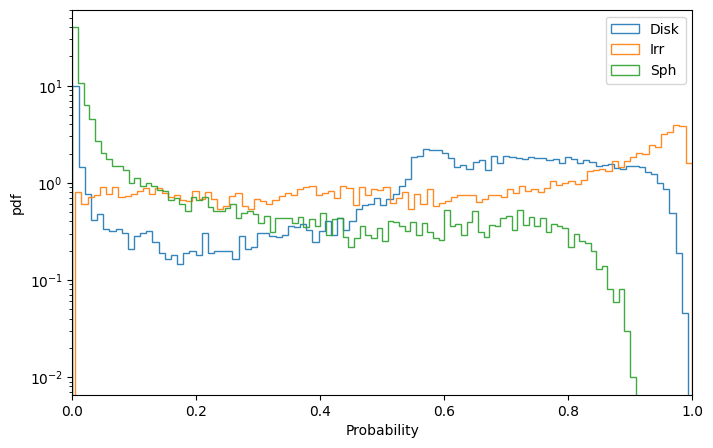

In [81]:

plt.figure(figsize=[8, 5])
plt.hist(df_loaded["P_Disk"], bins=100, density=True, alpha = 0.9, histtype='step', label = "Disk")
plt.hist(df_loaded["P_Irr"], bins=100, density=True, alpha = 0.9,histtype='step', label = "Irr")
plt.hist(df_loaded["P_Spheroid"], bins=100, density=True, alpha = 0.9, histtype='step', label = "Sph")
plt.yscale('log')
plt.xlim((0.0,1.0))
plt.xlabel("Probability")
plt.ylabel("pdf")
plt.legend()
plt.show()


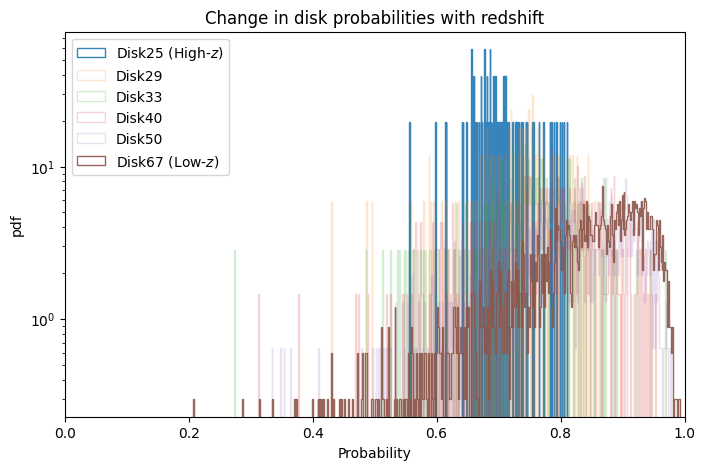

In [102]:
plt.figure(figsize=[8, 5])
plt.hist(Snap25_Spi["P_Disk"], bins=500, density=True, alpha = 0.9, histtype='step', label = r"Disk25 (High-$z$)")
plt.hist(Snap29_Spi["P_Disk"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Disk29")
plt.hist(Snap33_Spi["P_Disk"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Disk33")
plt.hist(Snap40_Spi["P_Disk"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Disk40")
plt.hist(Snap50_Spi["P_Disk"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Disk50")
plt.hist(Snap67_Spi["P_Disk"], bins=500, density=True, alpha = 0.9, histtype='step', label = r"Disk67 (Low-$z$)")
plt.yscale('log')
plt.xlim((0.0,1.0))
plt.xlabel("Probability")
plt.title('Change in disk probabilities with redshift')
plt.ylabel("pdf")
plt.legend()
plt.show()

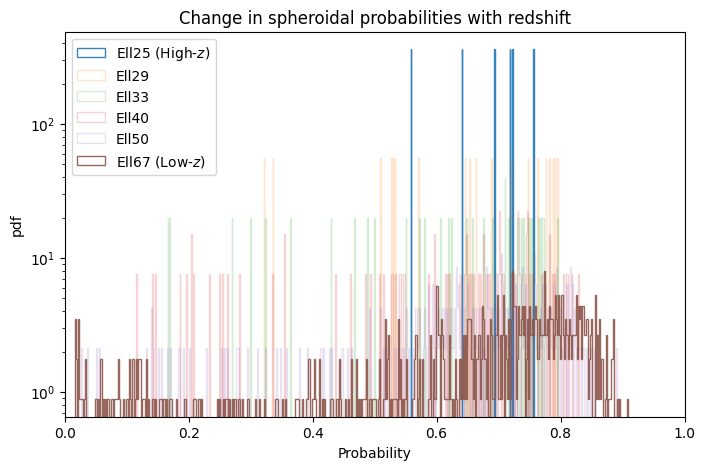

In [103]:
plt.figure(figsize=[8, 5])
plt.hist(Snap25_Ell["P_Spheroid"], bins=500, density=True, alpha = 0.9, histtype='step', label = r"Ell25 (High-$z$)")
plt.hist(Snap29_Ell["P_Spheroid"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Ell29")
plt.hist(Snap33_Ell["P_Spheroid"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Ell33")
plt.hist(Snap40_Ell["P_Spheroid"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Ell40")
plt.hist(Snap50_Ell["P_Spheroid"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Ell50")
plt.hist(Snap67_Ell["P_Spheroid"], bins=500, density=True, alpha = 0.9, histtype='step', label = r"Ell67 (Low-$z$)")
plt.yscale('log')
plt.xlim((0.0,1.0))
plt.xlabel("Probability")
plt.title('Change in spheroidal probabilities with redshift')
plt.ylabel("pdf")
plt.legend()
plt.show()

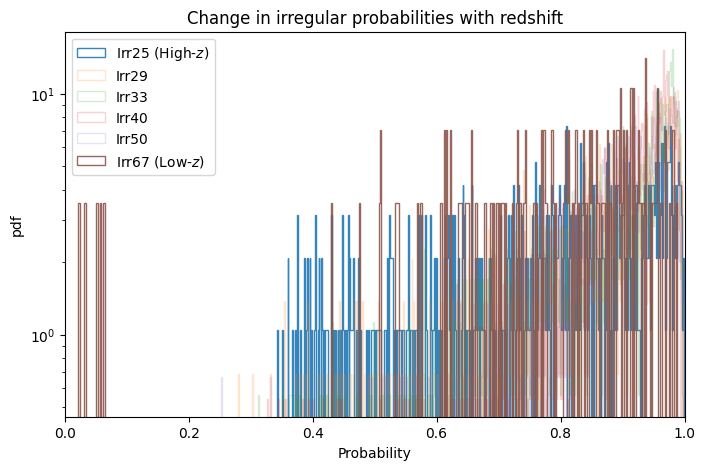

In [104]:
plt.figure(figsize=[8, 5])
plt.hist(Snap25_Irr["P_Irr"], bins=500, density=True, alpha = 0.9, histtype='step', label = r"Irr25 (High-$z$)")
plt.hist(Snap29_Irr["P_Irr"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Irr29")
plt.hist(Snap33_Irr["P_Irr"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Irr33")
plt.hist(Snap40_Irr["P_Irr"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Irr40")
plt.hist(Snap50_Irr["P_Irr"], bins=500, density=True, alpha = 0.2, histtype='step', label = "Irr50")
plt.hist(Snap67_Irr["P_Irr"], bins=500, density=True, alpha = 0.9, histtype='step', label = r"Irr67 (Low-$z$)")
plt.yscale('log')
plt.xlim((0.0,1.0))
plt.xlabel("Probability")
plt.title('Change in irregular probabilities with redshift')
plt.ylabel("pdf")
plt.legend()
plt.show()